In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import math
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/DS3_Tut2/seeds.csv")
df

,Area,Perimeter,Compactness,Kernel.Length,Kernel.Width,Asymmetry.Coeff,Kernel.Groove,Type
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1
...,...,...,...,...,...,...,...,...
194,12.19,13.20,0.8783,5.137,2.981,3.631,4.870,3
195,11.23,12.88,0.8511,5.140,2.795,4.325,5.003,3
196,13.20,13.66,0.8883,5.236,3.232,8.315,5.056,3
197,11.84,13.21,0.8521,5.175,2.836,3.598,5.044,3


In [ ]:
df_X = df.drop(['Type'],axis=1)
df_X

,Area,Perimeter,Compactness,Kernel.Length,Kernel.Width,Asymmetry.Coeff,Kernel.Groove
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175
...,...,...,...,...,...,...,...
194,12.19,13.20,0.8783,5.137,2.981,3.631,4.870
195,11.23,12.88,0.8511,5.140,2.795,4.325,5.003
196,13.20,13.66,0.8883,5.236,3.232,8.315,5.056
197,11.84,13.21,0.8521,5.175,2.836,3.598,5.044


# Data Normalisation and Standardisation

## Normalisation
* An attribute is normalised by scaling its value so that they fall within a small specified range (for example 0.0 to 1.0)
* Normalization is particularly useful for classification algorithms involving distance measurements and clustering.
* For distance based approaches, normalization helps prevent attributes with large ranges from overweighting attributes with smaller ranges.

## Attribute Min-Max Normalisation
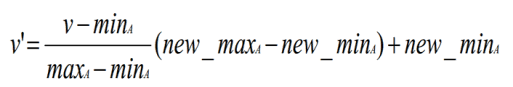

In [ ]:
df_X.columns

Index(['Area', 'Perimeter', 'Compactness', 'Kernel.Length', 'Kernel.Width',
       'Asymmetry.Coeff', 'Kernel.Groove'],
      dtype='object')

In [ ]:
# let's scale every attribute between 5 and 12
def normalise(col,new_min=0,new_max=1):
    return ((df_X[col] - df_X[col].min())*(new_max-new_min))/(df_X[col].max() - df_X[col].min()) + new_min


In [ ]:
print("Before Normalisation")
print("Minimum:",df['Area'].min())
print("Maximum:",df['Area'].max())

Before Normalisation
Minimum: 10.59
Maximum: 21.18


In [ ]:
df_normalised = df_X.copy()
for col in df_X.columns:
  df_normalised[col] = normalise(col)
print("After Normalisation:")
df_normalised

After Normalisation:


,Area,Perimeter,Compactness,Kernel.Length,Kernel.Width,Asymmetry.Coeff,Kernel.Groove
0,0.440982,0.502066,0.570780,0.486486,0.486101,0.192837,0.345150
1,0.405099,0.446281,0.662432,0.368806,0.501069,0.033497,0.215165
2,0.349386,0.347107,0.879310,0.220721,0.503920,0.256149,0.150665
3,0.306893,0.316116,0.793103,0.239302,0.533856,0.197870,0.140817
4,0.524079,0.533058,0.864791,0.427365,0.664291,0.078133,0.322994
...,...,...,...,...,...,...,...
194,0.151086,0.163223,0.637024,0.134009,0.250178,0.379594,0.172821
195,0.060434,0.097107,0.390200,0.135698,0.117605,0.471516,0.238306
196,0.246459,0.258264,0.727768,0.189752,0.429081,1.000000,0.264402
197,0.118036,0.165289,0.399274,0.155405,0.146828,0.375224,0.258493


In [ ]:
print("After Normalisation")
print("Minimum:",df_normalised['Area'].min())
print("Maximum:",df_normalised['Area'].max())

After Normalisation
Minimum: 0.0
Maximum: 1.0


## Standardisation
* The process of rescaling one or more attributes so that the transformed data have 0 mean and unit variance i.e. standard deviation of 1
* Standardization assumes that data is coming from Guassian distribution
* This assumption does not strictly have to be true, but this technique is more effective if your attributedistribution is Gaussian
* In this process, values of an attribute, A, are normalised based on the mean and standard deviation of A.
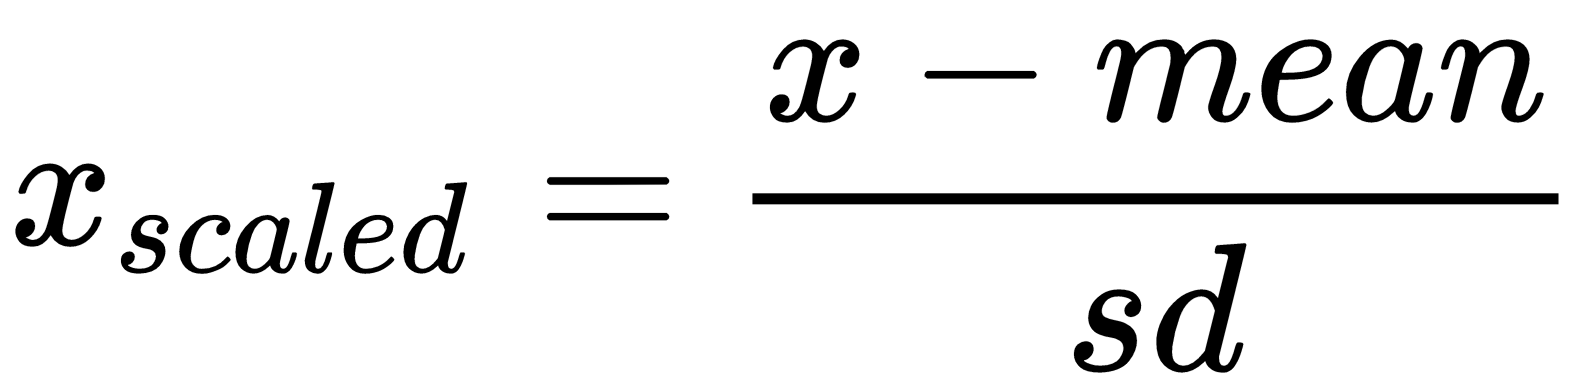

In [ ]:
def standardise(col):
  return (df_X[col]-df_X[col].mean())/df_X[col].std()

In [ ]:
print("Before Standardisation")
print("Mean:",df['Area'].mean())
print("Standard Deviation:",df['Area'].std())

Before Standardisation
Mean: 14.918743718592964
Standard Deviation: 2.9199757729810365


In [ ]:
df_standarised = df_X.copy()
for col in df_X.columns:
  df_standarised[col] = standardise(col)
print("After Standardisation:")
df_standarised

After Standardisation:


,Area,Perimeter,Compactness,Kernel.Length,Kernel.Width,Asymmetry.Coeff,Kernel.Groove
0,0.116870,0.186327,0.008124,0.270178,0.122825,-1.004836,-0.407238
1,-0.013269,-0.019710,0.441229,-0.200974,0.178333,-1.822590,-0.943041
2,-0.215325,-0.385998,1.466100,-0.793859,0.188906,-0.679910,-1.208914
3,-0.369436,-0.500463,1.058724,-0.719467,0.299923,-0.979005,-1.249505
4,0.418242,0.300792,1.397490,0.033475,0.783638,-1.593511,-0.498568
...,...,...,...,...,...,...,...
194,-0.934509,-1.065157,0.321160,-1.141024,-0.752092,-0.046371,-1.117583
195,-1.263279,-1.309349,-0.845221,-1.134261,-1.243737,0.425384,-0.847652
196,-0.588616,-0.714131,0.749977,-0.917847,-0.088635,3.137636,-0.740085
197,-1.054373,-1.057526,-0.802340,-1.055360,-1.135364,-0.068804,-0.764440


In [ ]:
print("After Standardisation")
print("Mean:",abs(round(df_standarised['Area'].mean(),1)))
print("Standard Deviation:",df_standarised['Area'].std())

After Standardisation
Mean: 0.0
Standard Deviation: 1.0


# Feature Selection
Irrelevant, weekly relevant or redundant attributes(dimensions) are detected and removed.Irrelevant or redundant features are detected using correlation analysis.

## First strategy:
* Perform the correlation analysis between every pair of
attributes
* Drop one among the two attributes when they are highly correlated.

In [ ]:
print("Correlation Table")
df_X.corr()

Correlation Table


,Area,Perimeter,Compactness,Kernel.Length,Kernel.Width,Asymmetry.Coeff,Kernel.Groove
Area,1.000000,0.994437,0.609887,0.951126,0.970980,-0.222820,0.862727
Perimeter,0.994437,1.000000,0.531841,0.972944,0.945496,-0.211034,0.889543
Compactness,0.609887,0.531841,1.000000,0.374011,0.762167,-0.329400,0.227016
Kernel.Length,0.951126,0.972944,0.374011,1.000000,0.862680,-0.169704,0.932124
Kernel.Width,0.970980,0.945496,0.762167,0.862680,1.000000,-0.253122,0.748228
Asymmetry.Coeff,-0.222820,-0.211034,-0.329400,-0.169704,-0.253122,1.000000,-0.003349
Kernel.Groove,0.862727,0.889543,0.227016,0.932124,0.748228,-0.003349,1.000000


One attribute out of area or perimeter can be dropped because they are highly correlated.

## Second strategy:
* Perform the correlation analysis between each attributeand target attribute
* Classification: Target attribute is class label attribute
* Regression: Target attribute is attribute corresponding to output variable
* Drop the attributes that are less correlated with target
attribute

In [ ]:
target = df['Type']
target

0      1
1      1
2      1
3      1
4      1
      ..
194    3
195    3
196    3
197    3
198    3
Name: Type, Length: 199, dtype: int64

In [ ]:
print("Correlation with the target attribute")
df.corrwith(df["Type"])

Correlation with the target attribute


Area              -0.340664
Perimeter         -0.322223
Compactness       -0.539261
Kernel.Length     -0.249422
Kernel.Width      -0.421961
Asymmetry.Coeff    0.573956
Kernel.Groove      0.035508
Type               1.000000
dtype: float64

Here Kernel.Groove can be dropped as it is very less correlated with the target attribute 'Type'.

# Data Prep for Classification
* Approach 1: When the number samples from eachclass are almost equal (Balanced data)
* Approach 2: When the number samples from each classare not equal (Imbalanced data)

In [ ]:
df2 = df.groupby(['Type'])['Type'].count()
print(df2)

Type
1    66
2    68
3    65
Name: Type, dtype: int64


All three classes have almost equal number of samples so we will use approach 1.

In [ ]:
# using the train test split function 70-30 split
X_train, X_test,y_train, y_test = train_test_split(np.array(df_X),np.array(df['Type']) ,random_state=42, test_size=0.30, shuffle=True)

In [ ]:
X_train

# Distance Metrics
## Euclidean Distance

In [ ]:
def Euclidean_dist(pt1,pt2):
    distance=0.0
    for i in range(len(pt1)):
        distance += (pt1[i]-pt2[i])**2
    return math.sqrt(distance)

In [ ]:
# Let our test example be
test_ex = X_test[0]
test_ex

array([18.88  , 16.26  ,  0.8969,  6.084 ,  3.764 ,  1.649 ,  6.109 ])

In [ ]:
# computing euclidean distance
distance = []
for x_t in X_train:
  distance.append(Euclidean_dist(x_t,test_ex))

# distance

## Manhattan Distance


In [ ]:
def Manhattan_dist(pt1,pt2):
    distance=0.0
    for i in range(len(pt1)):
        distance += abs(pt1[i]-pt2[i])
    return distance

In [ ]:
# using the train test split function 70-30 split
X_train, X_test,y_train, y_test = train_test_split(np.array(df_normalised),np.array(df['Type']) ,random_state=42, test_size=0.30, shuffle=True)

In [ ]:
X_train

In [ ]:
# computing Manhattan distance
distance = []
for x_t in X_train:
  distance.append(Manhattan_dist(x_t,test_ex))

# distance

Manhattan distance is preferred over Euclidean distance when we have a case of high dimensionality.

# Choosing the right value of K

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df_X, df['Type'], test_size=0.2, random_state=0)
print(f"X_train: {X_train.shape} \t X_test: {X_test.shape}")
print(f"y_train: {y_train.shape} \t y_test: {y_test.shape}")

X_train: (159, 7) 	 X_test: (40, 7)
y_train: (159,) 	 y_test: (40,)


Fit a KNN classifier and evaluate it

In [ ]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
knn.score(X_test, y_test)

0.925

Split the training data further for cross-validation

In [ ]:
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.25, random_state=0)
print(f"X_train: {X_train.shape} \t X_valid: {X_valid.shape}")
print(f"y_train: {y_train.shape} \t y_valid: {y_valid.shape}")

X_train: (119, 7) 	 X_valid: (40, 7)
y_train: (119,) 	 y_valid: (40,)


Choose optimal value of K using cross-validation

In [ ]:
error_rate = {}
for k in range(1, 33):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    pred = knn.predict(X_valid)
    error_rate[k] = np.mean(pred != y_valid)

best_k = min(error_rate, key=error_rate.get)
print(f"Optimal K : {best_k}")

Optimal K : 17


Text(0, 0.5, 'Error rate')

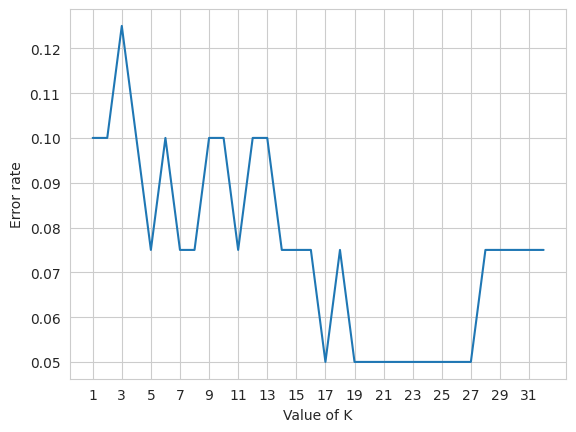

In [ ]:
sns.set_style("whitegrid")
ax = sns.lineplot(error_rate)
ax.set_xticks(range(1, 33, 2))
ax.set_xlabel("Value of K")
ax.set_ylabel("Error rate")

### Choosing optimal values of K  

 - Prefer prime values of K so as to prevent any ties during classification  

 - A good starting value is $K = \sqrt{N}$ where $N$ is the total number of training samples  

<br/>
Why use prime values of K instead of just odd values?  

Example: Consider KNN on 3 classes with $K = 9$ where 3 neighbours belong to each class leading to a tie.

# KNN for Classification

In [ ]:
# Normalize the data
scaler = StandardScaler()
X_normalized = scaler.fit_transform(df_X)
y = df['Type']
X_normalized

array([[ 0.11716431,  0.18679667,  0.0081443 , ...,  0.12313474,
        -1.00737062, -0.40826475],
       [-0.01330197, -0.01975993,  0.44234139, ...,  0.17878306,
        -1.82718718, -0.9454197 ],
       [-0.21586804, -0.38697165,  1.46979786, ...,  0.18938275,
        -0.68162472, -1.21196249],
       ...,
       [-0.59010028, -0.71593216,  0.75186803, ..., -0.08885888,
         3.14554887, -0.74195192],
       [-1.05703224, -1.06019315, -0.80436312, ..., -1.13822732,
        -0.06897709, -0.76636805],
       [-0.89909937, -0.96073998, -0.10362921, ..., -0.77253832,
         1.32055406, -0.72770917]])

## Handling Imbalanced Datasets

Imbalanced datasets occur when one class has significantly more samples than others. In such cases, the model may be biased towards the majority class. To address this issue, you can use the following techniques:

1. **Oversampling:** Increasing the number of instances in the minority class.
2. **Undersampling:** Reducing the number of instances in the majority class.
3. **Resampling:** Combining oversampling and undersampling techniques.
4. **Using Different Metrics:** Instead of accuracy, use metrics like precision, recall, F1-score, or area under the ROC curve (AUC) to evaluate the model's performance.

We will use appropriate metrics to evaluate our KNN classification model's performance.

In [ ]:
from imblearn.over_sampling import RandomOverSampler
from collections import Counter

# Create an oversampler
oversampler = RandomOverSampler(sampling_strategy='auto', random_state=42)

# Apply the oversampling to the data
X_resampled, y_resampled = oversampler.fit_resample(X_normalized, y)

In [ ]:
from imblearn.under_sampling import RandomUnderSampler

# Create an undersampler
undersampler = RandomUnderSampler(sampling_strategy='auto', random_state=42)

# Apply the undersampling to the data
X_resampled, y_resampled = undersampler.fit_resample(X_normalized, y)

In [ ]:
Counter(y_resampled)

Counter({1: 65, 2: 65, 3: 65})

## K-Nearest Neighbors (KNN) Classification

K-Nearest Neighbors (KNN) is a simple and intuitive machine learning algorithm used for classification tasks. It classifies a data point based on the majority class among its K-nearest neighbors in the feature space. In other words, if most of the K-nearest data points belong to a certain class, the algorithm assigns that class to the new data point.

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=42)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

# Create a KNN classifier (you can specify the number of neighbors, 'n_neighbors')
knn_classifier = KNeighborsClassifier(n_neighbors=3)

# Fit the model to the training data
knn_classifier.fit(X_train, y_train)

# Make predictions on the test data
y_pred = knn_classifier.predict(X_test)


# Evaluation Metrics

1. **Recall/Sensitivity:** For one class, how many samples are predicted correctly.
2. **Precision/Specificity:** Allows calculation of a class specific problem.
3. **F1 Score:** Harmonic mean of recall and precision.

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Calculate precision, recall, and F1-score
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Print the evaluation metrics
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-score: {f1:.2f}")

Accuracy: 0.93
Precision: 0.93
Recall: 0.93
F1-score: 0.93


In [ ]:
print(y_test.values)
print(y_pred)

[3 1 3 2 2 3 1 1 2 2 3 1 2 1 3 2 2 2 3 2 2 3 2 1 3 2 2 2 1 2 2 2 1 3 2 3 1
 3 2 1 3 2 3 2 1 2 1 3 1 2 2 3 2 2 1 3 1 1 3]
[3 1 1 2 2 3 1 1 2 2 3 1 2 1 3 2 2 2 3 2 2 3 1 1 3 2 2 2 1 2 2 2 1 3 2 3 1
 3 2 1 3 2 3 2 1 2 1 3 3 2 2 3 2 2 1 3 1 2 3]
